In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import platform
path = 'C:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~')
    
plt.rcParams['axes.unicode_minus'] = False

In [2]:
from selenium import webdriver
import time

In [3]:
driver = webdriver.Chrome('../driver/chromedriver.exe')
driver.get('http://info.nec.go.kr/')

In [4]:
driver.switch_to_default_content()
driver.switch_to_frame('main')

In [5]:
#'역대선거'항목 클릭
driver.find_element_by_xpath("""//*[@id="header"]/ul[1]/li[2]/a""").click()

In [6]:
# '투개표'항목 클릭
driver.find_element_by_xpath("""//*[@id="presubmu"]/li[3]/a""").click()

In [7]:
# '개표현황(읍면동별)'항목 클릭
driver.find_element_by_xpath("""//*[@id="header"]/div[4]/ul/li[5]/a""").click()

In [8]:
# '대통령선거'항목 클릭
driver.find_element_by_xpath("""//*[@id="electionType1"]""").click()

In [9]:
election_list_raw = driver.find_element_by_xpath("""//*[@id="electionName"]""")
election_list = election_list_raw.find_elements_by_tag_name("option")

election_name_values = [option.text for option in election_list]
election_name_values = election_name_values[1:]
election_name_values

['제19대', '제18대', '제17대']

In [19]:
element = driver.find_element_by_id('electionName')
element.send_keys(election_name_values[1])

In [20]:
election_code_raw = driver.find_element_by_xpath("""//*[@id="electionCode"]""")
election_code = election_code_raw.find_elements_by_tag_name("option")

election_code_values = [option.text for option in election_code]
election_code_values = election_code_values[1:]
election_code_values

['대통령선거']

In [21]:
element = driver.find_element_by_id('electionCode')
element.send_keys(election_code_values[0])

In [22]:
sido_list_raw = driver.find_element_by_xpath("""//*[@id="cityCode"]""")
sido_list = sido_list_raw.find_elements_by_tag_name("option")

sido_name_values = [option.text for option in sido_list]
sido_name_values = sido_name_values[1:]
sido_name_values

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [23]:
element = driver.find_element_by_id('cityCode')
element.send_keys(sido_name_values[0])

In [24]:
sigun_list_raw = driver.find_element_by_xpath("""//*[@id="townCode"]""")
sigun_list = sigun_list_raw.find_elements_by_tag_name("option")

sigun_name_values = [option.text for option in sigun_list]
sigun_name_values = sigun_name_values[1:]
sigun_name_values

['종로구',
 '중구',
 '용산구',
 '성동구',
 '광진구',
 '동대문구',
 '중랑구',
 '성북구',
 '강북구',
 '도봉구',
 '노원구',
 '은평구',
 '서대문구',
 '마포구',
 '양천구',
 '강서구',
 '구로구',
 '금천구',
 '영등포구',
 '동작구',
 '관악구',
 '서초구',
 '강남구',
 '송파구',
 '강동구']

In [25]:
element = driver.find_element_by_id('townCode')
element.send_keys(sigun_name_values[0])

In [26]:
driver.find_element_by_xpath("""//*[@id="searchBtn"]""").click()

In [27]:
from bs4 import BeautifulSoup

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [29]:
tmp = soup.find_all('td','alignR')
tmp[:4]

[<td class="alignR">141,447</td>,
 <td class="alignR">103,189</td>,
 <td class="alignR">49,422</td>,
 <td class="alignR">52,747</td>]

In [30]:
from tqdm import tqdm_notebook

In [31]:
sido_name_list = []
sigun_name_list = []
        
for sido_name_value in tqdm_notebook(sido_name_values):
    element = driver.find_element_by_id('cityCode')
    element.send_keys(sido_name_value)
            
    time.sleep(1)
            
    sigun_list_raw = driver.find_element_by_xpath("""//*[@id="townCode"]""")
    sigun_list = sigun_list_raw.find_elements_by_tag_name("option")
    
    sigun_name_values = [option.text for option in sigun_list]
    sigun_name_values = sigun_name_values[1:]
            
    for sigun_name_value in sigun_name_values:
        sido_name_list.append(sido_name_value)
        sigun_name_list.append(sigun_name_value)


In [32]:
election_result = pd.DataFrame({'광역시도':sido_name_list,"시군구":sigun_name_list})

election_result.head()

,광역시도,시군구
0,서울특별시,종로구
1,서울특별시,중구
2,서울특별시,용산구
3,서울특별시,성동구
4,서울특별시,광진구


In [33]:
def get_vote_info(n):
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    tmp = soup.find_all('td','alignR')
    tmp_values = [float(tmp_val.get_text().replace(',','')) for tmp_val in tmp[1:4]]
    
    
    pop[n] = tmp_values[0]
    park[n] = tmp_values[1]
    moon[n] = tmp_values[2]

In [34]:
import numpy as np

def fail_procedure(n):
    pop[n] = np.nan
    park[n] = np.nan
    moon[n] = np.nan


In [35]:
pop = [np.nan]*len(election_result)
park = [np.nan]*len(election_result)
moon = [np.nan]*len(election_result)

len(park), len(pop),len(moon)

(251, 251, 251)

In [36]:
for n in tqdm_notebook(election_result.index):
    try:
        element = driver.find_element_by_id('cityCode')
        element.send_keys(election_result['광역시도'][n])
        
        time.sleep(1)
        
        element = driver.find_element_by_id('townCode')
        element.send_keys(election_result['시군구'][n])
        
        driver.find_element_by_xpath("""//*[@id="searchBtn"]""").click()
        
        time.sleep(1)
        
        get_vote_info(n)
        
    except:
        print('EEERRRRRROOORRR')
        fail_procedure(n)

EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRRROOORRR
EEERRRRR

In [29]:
# element = driver.find_element_by_id('cityCode')
# element.send_keys(election_result['광역시도'][1])
        
# time.sleep(0.5)
        
# element = driver.find_element_by_id('townCode')
# element.send_keys(election_result['시군구'][1])
        
# driver.find_element_by_xpath("""//*[@id="searchBtn"]""").click()
        
# time.sleep(0.5)
        
# get_vote_info(1)

In [47]:
election_result['pop'] = pop
election_result['park'] = park
election_result['moon'] = moon


election_result.head()

,광역시도,시군구,pop,park,moon
0,서울특별시,종로구,103189.0,49422.0,52747.0
1,서울특별시,중구,83095.0,40289.0,41919.0
2,서울특별시,용산구,147849.0,76997.0,69572.0
3,서울특별시,성동구,185566.0,88658.0,95239.0
4,서울특별시,광진구,231171.0,106675.0,122537.0


In [48]:
re_try_index = election_result[election_result['pop'].isnull()].index

for n in tqdm_notebook(re_try_index):
    try:
        element = driver.find_element_by_id('cityCode')
        element.send_keys(election_result['광역시도'][n])
        
        time.sleep(1)
        
        element = driver.find_element_by_id('townCode')
        element.send_keys(election_result['시군구'][n])
        
        driver.find_element_by_xpath("""//*[@id="searchBtn"]""").click()
        
        time.sleep(1)
        
        get_vote_info(n)
        
    except:
        print('EEERRRRRROOORRR')
        fail_procedure(n)

In [49]:
election_result.to_csv('../data/05.electionresult2.csv',encoding='utf-8',sep=',')

In [50]:
driver.close()

In [91]:
election_result = pd.read_csv('../data/05.electionresult2.csv',encoding='utf-8',index_col=0)
election_result.head()

,광역시도,시군구,pop,park,moon
0,서울특별시,종로구,103189.0,49422.0,52747.0
1,서울특별시,중구,83095.0,40289.0,41919.0
2,서울특별시,용산구,147849.0,76997.0,69572.0
3,서울특별시,성동구,185566.0,88658.0,95239.0
4,서울특별시,광진구,231171.0,106675.0,122537.0


In [92]:
sido_candi = election_result['광역시도']
sido_candi = [name[:2] if name[:2] in ['서울','부산','대구','광주','인천','대전','울산'] else '' for name in sido_candi]

In [93]:
sido_candi

['서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '서울',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '부산',
 '대구',
 '대구',
 '대구',
 '대구',
 '대구',
 '대구',
 '대구',
 '대구',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '인천',
 '광주',
 '광주',
 '광주',
 '광주',
 '광주',
 '대전',
 '대전',
 '대전',
 '대전',
 '대전',
 '울산',
 '울산',
 '울산',
 '울산',
 '울산',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '

In [94]:
def cut_char_sigu(name):
    return name if len(name)==2 else name[:-1]

In [95]:
import re

sigun_candi = ['']*len(election_result)

for n in election_result.index:
    each = election_result['시군구'][n]
    if each[:2] in ['수원','성남','안양','안산','고양','용인','청주','천안','전주','포항','창원','부천']:
        sigun_candi[n] = re.split('시',each)[0]+' '+cut_char_sigu(re.split('시',each)[1])
    else:
        sigun_candi[n] = cut_char_sigu(each)
        
sigun_candi

['종로',
 '중구',
 '용산',
 '성동',
 '광진',
 '동대문',
 '중랑',
 '성북',
 '강북',
 '도봉',
 '노원',
 '은평',
 '서대문',
 '마포',
 '양천',
 '강서',
 '구로',
 '금천',
 '영등포',
 '동작',
 '관악',
 '서초',
 '강남',
 '송파',
 '강동',
 '중구',
 '서구',
 '동구',
 '영도',
 '부산진',
 '동래',
 '남구',
 '북구',
 '해운대',
 '기장',
 '사하',
 '금정',
 '강서',
 '연제',
 '수영',
 '사상',
 '중구',
 '동구',
 '서구',
 '남구',
 '북구',
 '수성',
 '달서',
 '달성',
 '중구',
 '동구',
 '남구',
 '연수',
 '남동',
 '부평',
 '계양',
 '서구',
 '강화',
 '옹진',
 '동구',
 '서구',
 '남구',
 '북구',
 '광산',
 '동구',
 '중구',
 '서구',
 '유성',
 '대덕',
 '중구',
 '남구',
 '동구',
 '북구',
 '울주',
 '세종특별자치',
 '수원 장안',
 '수원 권선',
 '수원 팔달',
 '수원 영통',
 '성남 수정',
 '성남 중원',
 '성남 분당',
 '의정부',
 '안양 만안',
 '안양 동안',
 '부천 원미',
 '부천 소사',
 '부천 오정',
 '광명',
 '평택',
 '양주',
 '동두천',
 '안산 상록',
 '안산 단원',
 '고양 덕양',
 '고양 일산동',
 '고양 일산서',
 '과천',
 '의왕',
 '구리',
 '남양주',
 '오산',
 '화성',
 '시흥',
 '군포',
 '하남',
 '파주',
 '여주',
 '이천',
 '용인 처인',
 '용인 수지',
 '용인 기흥',
 '안성',
 '김포',
 '광주',
 '포천',
 '연천',
 '양평',
 '가평',
 '춘천',
 '원주',
 '강릉',
 '동해',
 '삼척',
 '태백',
 '정선',
 '속초',
 '고성',
 '양양',
 '인제',
 '홍천',
 '횡성',
 '

In [96]:
ID_candi = [sido_candi[n]+' '+sigun_candi[n] for n in range(0,len(sigun_candi))]

ID_candi = [name[1:] if name[0] == ' ' else name for name in ID_candi]
ID_candi = [name[:2] if name[:2] == '세종' else name for name in ID_candi]

ID_candi

['서울 종로',
 '서울 중구',
 '서울 용산',
 '서울 성동',
 '서울 광진',
 '서울 동대문',
 '서울 중랑',
 '서울 성북',
 '서울 강북',
 '서울 도봉',
 '서울 노원',
 '서울 은평',
 '서울 서대문',
 '서울 마포',
 '서울 양천',
 '서울 강서',
 '서울 구로',
 '서울 금천',
 '서울 영등포',
 '서울 동작',
 '서울 관악',
 '서울 서초',
 '서울 강남',
 '서울 송파',
 '서울 강동',
 '부산 중구',
 '부산 서구',
 '부산 동구',
 '부산 영도',
 '부산 부산진',
 '부산 동래',
 '부산 남구',
 '부산 북구',
 '부산 해운대',
 '부산 기장',
 '부산 사하',
 '부산 금정',
 '부산 강서',
 '부산 연제',
 '부산 수영',
 '부산 사상',
 '대구 중구',
 '대구 동구',
 '대구 서구',
 '대구 남구',
 '대구 북구',
 '대구 수성',
 '대구 달서',
 '대구 달성',
 '인천 중구',
 '인천 동구',
 '인천 남구',
 '인천 연수',
 '인천 남동',
 '인천 부평',
 '인천 계양',
 '인천 서구',
 '인천 강화',
 '인천 옹진',
 '광주 동구',
 '광주 서구',
 '광주 남구',
 '광주 북구',
 '광주 광산',
 '대전 동구',
 '대전 중구',
 '대전 서구',
 '대전 유성',
 '대전 대덕',
 '울산 중구',
 '울산 남구',
 '울산 동구',
 '울산 북구',
 '울산 울주',
 '세종',
 '수원 장안',
 '수원 권선',
 '수원 팔달',
 '수원 영통',
 '성남 수정',
 '성남 중원',
 '성남 분당',
 '의정부',
 '안양 만안',
 '안양 동안',
 '부천 원미',
 '부천 소사',
 '부천 오정',
 '광명',
 '평택',
 '양주',
 '동두천',
 '안산 상록',
 '안산 단원',
 '고양 덕양',
 '고양 일산동',
 '고양 일산서',
 '과천',
 '의왕',
 '구리',
 '남양주',
 '오산',
 '화

In [97]:
election_result['ID'] = ID_candi
election_result.head(10)

,광역시도,시군구,pop,park,moon,ID
0,서울특별시,종로구,103189.0,49422.0,52747.0,서울 종로
1,서울특별시,중구,83095.0,40289.0,41919.0,서울 중구
2,서울특별시,용산구,147849.0,76997.0,69572.0,서울 용산
3,서울특별시,성동구,185566.0,88658.0,95239.0,서울 성동
4,서울특별시,광진구,231171.0,106675.0,122537.0,서울 광진
5,서울특별시,동대문구,227177.0,107972.0,116909.0,서울 동대문
6,서울특별시,중랑구,253369.0,121391.0,129630.0,서울 중랑
7,서울특별시,성북구,295525.0,134557.0,158429.0,서울 성북
8,서울특별시,강북구,207927.0,94479.0,111470.0,서울 강북
9,서울특별시,도봉구,225230.0,106942.0,116266.0,서울 도봉


In [98]:
election_result[['rate_park','rate_moon']] = election_result[['park','moon']].div(election_result['pop'], axis=0)

election_result.head()

,광역시도,시군구,pop,park,moon,ID,rate_park,rate_moon
0,서울특별시,종로구,103189.0,49422.0,52747.0,서울 종로,0.478946,0.511169
1,서울특별시,중구,83095.0,40289.0,41919.0,서울 중구,0.484855,0.504471
2,서울특별시,용산구,147849.0,76997.0,69572.0,서울 용산,0.520781,0.470561
3,서울특별시,성동구,185566.0,88658.0,95239.0,서울 성동,0.477771,0.513235
4,서울특별시,광진구,231171.0,106675.0,122537.0,서울 광진,0.461455,0.530071


In [99]:
election_result.sort_values(['rate_park'], ascending = False).head()

,광역시도,시군구,pop,park,moon,ID,rate_park,rate_moon
220,경상북도,군위군,17848.0,15457.0,2126.0,군위,0.866035,0.119117
224,경상북도,영덕군,27535.0,23816.0,3314.0,영덕,0.864936,0.120356
221,경상북도,의성군,40089.0,34294.0,5167.0,의성,0.855447,0.128888
218,경상북도,성주군,31019.0,26511.0,4077.0,성주,0.854670,0.131436
43,대구광역시,서구,143549.0,120625.0,22092.0,대구 서구,0.840305,0.153899


In [100]:
election_result.sort_values(['rate_moon'], ascending = False).head()

,광역시도,시군구,pop,park,moon,ID,rate_park,rate_moon
63,광주광역시,광산구,220876.0,15548.0,204061.0,광주 광산,0.070392,0.923871
62,광주광역시,북구,276928.0,20378.0,255181.0,광주 북구,0.073586,0.921471
60,광주광역시,서구,194600.0,15648.0,178033.0,광주 서구,0.080411,0.914866
61,광주광역시,남구,137610.0,11307.0,125439.0,광주 남구,0.082167,0.911554
181,전라남도,목포시,141368.0,11971.0,128448.0,목포,0.084680,0.908607


In [101]:
draw_korea = pd.read_csv('../data/05. draw_korea.csv',encoding='utf-8')

In [109]:
set(draw_korea['ID'].unique()) - set(election_result['ID'].unique())

{'청주 서원', '청주 청원'}

In [110]:
set(election_result['ID'].unique()) - set(draw_korea['ID'].unique())

{'청원'}

In [104]:
election_result[election_result['ID']=='고성']

,광역시도,시군구,pop,park,moon,ID,rate_park,rate_moon
127,강원도,고성군,19177.0,12689.0,6285.0,고성,0.661678,0.327736
234,경상남도,고성군,35555.0,25076.0,9673.0,고성,0.705274,0.272057


In [105]:
election_result.loc[127,'ID'] = '고성(강원)'
election_result.loc[234,'ID'] = '고성(경남)'

election_result[election_result['시군구']=='고성군']

,광역시도,시군구,pop,park,moon,ID,rate_park,rate_moon
127,강원도,고성군,19177.0,12689.0,6285.0,고성(강원),0.661678,0.327736
234,경상남도,고성군,35555.0,25076.0,9673.0,고성(경남),0.705274,0.272057


In [106]:
election_result[election_result['광역시도']=='경상남도']

,광역시도,시군구,pop,park,moon,ID,rate_park,rate_moon
227,경상남도,창원시의창구,155306.0,93834.0,60126.0,창원 의창,0.604188,0.387145
228,경상남도,창원시성산구,150912.0,82487.0,67332.0,창원 성산,0.546590,0.446167
229,경상남도,창원시마산합포구,118829.0,82970.0,34740.0,창원 마산합포,0.698230,0.292353
230,경상남도,창원시마산회원구,138388.0,91940.0,45353.0,창원 마산회원,0.664364,0.327724
231,경상남도,창원시진해구,106832.0,68464.0,37511.0,창원 진해,0.640857,0.351121
232,경상남도,진주시,208886.0,140404.0,66038.0,진주,0.672156,0.316144
233,경상남도,통영시,82118.0,56873.0,24216.0,통영,0.692577,0.294893
234,경상남도,고성군,35555.0,25076.0,9673.0,고성(경남),0.705274,0.272057
235,경상남도,사천시,70371.0,48033.0,21237.0,사천,0.682568,0.301786
236,경상남도,김해시,290612.0,150925.0,137372.0,김해,0.519335,0.472699


In [107]:
election_result.loc[229,'ID'] = '창원 합포'
election_result.loc[230,'ID'] = '창원 회원'

election_result[election_result['광역시도']=='경상남도']

,광역시도,시군구,pop,park,moon,ID,rate_park,rate_moon
227,경상남도,창원시의창구,155306.0,93834.0,60126.0,창원 의창,0.604188,0.387145
228,경상남도,창원시성산구,150912.0,82487.0,67332.0,창원 성산,0.546590,0.446167
229,경상남도,창원시마산합포구,118829.0,82970.0,34740.0,창원 합포,0.698230,0.292353
230,경상남도,창원시마산회원구,138388.0,91940.0,45353.0,창원 회원,0.664364,0.327724
231,경상남도,창원시진해구,106832.0,68464.0,37511.0,창원 진해,0.640857,0.351121
232,경상남도,진주시,208886.0,140404.0,66038.0,진주,0.672156,0.316144
233,경상남도,통영시,82118.0,56873.0,24216.0,통영,0.692577,0.294893
234,경상남도,고성군,35555.0,25076.0,9673.0,고성(경남),0.705274,0.272057
235,경상남도,사천시,70371.0,48033.0,21237.0,사천,0.682568,0.301786
236,경상남도,김해시,290612.0,150925.0,137372.0,김해,0.519335,0.472699


In [116]:
election_result[election_result['광역시도']=='충청북도']

,광역시도,시군구,pop,park,moon,ID,rate_park,rate_moon
137,충청북도,청주시상당구,141798.0,76695.0,64194.0,청주 상당,0.540875,0.452714
138,충청북도,청주시흥덕구,245334.0,124308.0,119523.0,청주 흥덕,0.506689,0.487185
139,충청북도,충주시,122824.0,73561.0,48264.0,충주,0.598914,0.392953
140,충청북도,제천시,82747.0,50284.0,31682.0,제천,0.607684,0.382878
141,충청북도,단양군,19763.0,12957.0,6510.0,단양,0.655619,0.329403
142,충청북도,청원군,91243.0,46968.0,43359.0,청원,0.514757,0.475204
143,충청북도,영동군,32044.0,20397.0,11169.0,영동,0.636531,0.348552
144,충청북도,보은군,22431.0,13783.0,8261.0,보은,0.614462,0.368285
145,충청북도,옥천군,34030.0,21799.0,11691.0,옥천,0.640582,0.343550
146,충청북도,음성군,52943.0,30459.0,21825.0,음성,0.575317,0.412236


In [117]:
election_result.tail()

,광역시도,시군구,pop,park,moon,ID,rate_park,rate_moon
246,경상남도,산청군,23738.0,16979.0,5996.0,산청,0.715267,0.252591
247,경상남도,거창군,40103.0,28726.0,10466.0,거창,0.716306,0.260978
248,경상남도,합천군,33586.0,25313.0,7114.0,합천,0.753677,0.211814
249,제주특별자치도,제주시,241552.0,119563.0,119622.0,제주,0.494978,0.495223
250,제주특별자치도,서귀포시,89415.0,46621.0,41613.0,서귀포,0.521400,0.465392


In [118]:
pop_tmp = election_result.loc[142,'pop']/2
park_tmp = election_result.loc[142,'park']/2
moon_tmp = election_result.loc[142,'moon']/2

rate_park_tmp = election_result.loc[142,'rate_park']
rate_moon_tmp = election_result.loc[142,'rate_moon']


In [119]:
election_result.loc[251] = ['충청북도','청주시',pop_tmp,park_tmp,moon_tmp,'청주 서원',rate_park_tmp,rate_moon_tmp]
election_result.loc[252] = ['충청북도','청주시',pop_tmp,park_tmp,moon_tmp,'청주 청원',rate_park_tmp,rate_moon_tmp]

In [120]:
election_result[election_result['시군구']=='청주시']

,광역시도,시군구,pop,park,moon,ID,rate_park,rate_moon
251,충청북도,청주시,45621.5,23484.0,21679.5,청주 서원,0.514757,0.475204
252,충청북도,청주시,45621.5,23484.0,21679.5,청주 청원,0.514757,0.475204


In [121]:
election_result.drop([142], inplace=True)
election_result[election_result['시군구']=='청원군']

,광역시도,시군구,pop,park,moon,ID,rate_park,rate_moon


In [122]:
final_elect_data = pd.merge(election_result,draw_korea, how='left',on=['ID'])
final_elect_data.head()

,광역시도,시군구,pop,park,moon,ID,rate_park,rate_moon,Unnamed: 0,y,x
0,서울특별시,종로구,103189.0,49422.0,52747.0,서울 종로,0.478946,0.511169,34,4,6
1,서울특별시,중구,83095.0,40289.0,41919.0,서울 중구,0.484855,0.504471,45,5,6
2,서울특별시,용산구,147849.0,76997.0,69572.0,서울 용산,0.520781,0.470561,56,6,6
3,서울특별시,성동구,185566.0,88658.0,95239.0,서울 성동,0.477771,0.513235,46,5,7
4,서울특별시,광진구,231171.0,106675.0,122537.0,서울 광진,0.461455,0.530071,57,6,7


In [123]:
final_elect_data.tail()

,광역시도,시군구,pop,park,moon,ID,rate_park,rate_moon,Unnamed: 0,y,x
247,경상남도,합천군,33586.0,25313.0,7114.0,합천,0.753677,0.211814,172,16,7
248,제주특별자치도,제주시,241552.0,119563.0,119622.0,제주,0.494978,0.495223,250,25,5
249,제주특별자치도,서귀포시,89415.0,46621.0,41613.0,서귀포,0.521400,0.465392,251,26,5
250,충청북도,청주시,45621.5,23484.0,21679.5,청주 서원,0.514757,0.475204,150,14,7
251,충청북도,청주시,45621.5,23484.0,21679.5,청주 청원,0.514757,0.475204,139,13,7


In [125]:
final_elect_data['moon_vs_park']=final_elect_data['rate_moon'] - final_elect_data['rate_park']

In [126]:
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

In [127]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = 20

    datalabel = targetData
    
    tmp_max = max([np.abs(min(blockedMap[targetData])), np.abs(max(blockedMap[targetData]))])

    vmin, vmax = -tmp_max, tmp_max

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)
    
    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, 
               edgecolor='#aaaaaa', linewidth=0.5)

    # 지역 이름 표시
    for idx, row in blockedMap.iterrows():
        # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. 
        #(중구, 서구)
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0], row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 10.0, 1.1
        else:
            fontsize, linespacing = 11, 1.

        annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                     fontsize=fontsize, ha='center', va='center', color=annocolor,
                     linespacing=linespacing)

    # 시도 경계 그린다.
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs, ys, c='black', lw=2)

    plt.gca().invert_yaxis()

    plt.axis('off')

    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

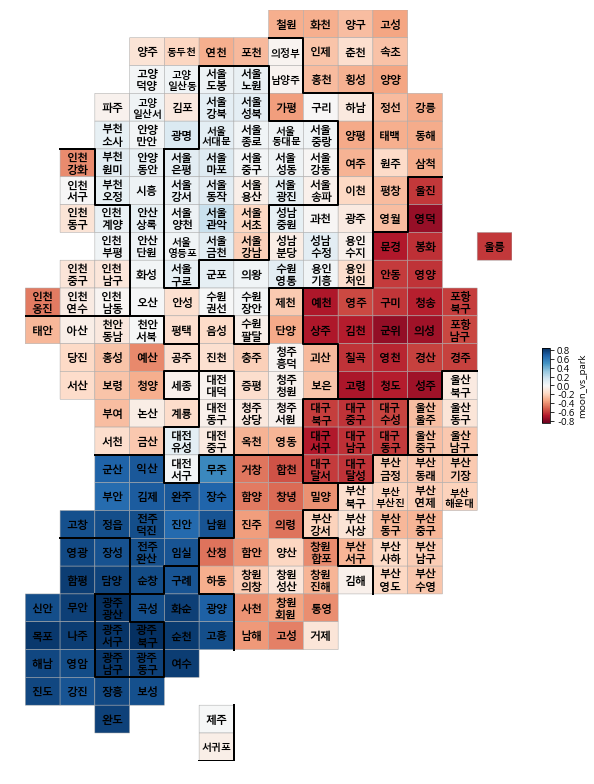

In [128]:
drawKorea('moon_vs_park', final_elect_data, 'RdBu')

In [129]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [130]:
pop_folium = final_elect_data.set_index('ID')

del pop_folium['광역시도']
del pop_folium['시군구']

pop_folium.head()

,pop,park,moon,rate_park,rate_moon,Unnamed: 0,y,x,moon_vs_ahn,moon_vs_park
ID,,,,,,,,,,
서울 종로,103189.0,49422.0,52747.0,0.478946,0.511169,34,4,6,0.032222,0.032222
서울 중구,83095.0,40289.0,41919.0,0.484855,0.504471,45,5,6,0.019616,0.019616
서울 용산,147849.0,76997.0,69572.0,0.520781,0.470561,56,6,6,-0.050220,-0.050220
서울 성동,185566.0,88658.0,95239.0,0.477771,0.513235,46,5,7,0.035464,0.035464
서울 광진,231171.0,106675.0,122537.0,0.461455,0.530071,57,6,7,0.068616,0.068616


In [132]:
geo_path = '../data/05. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_str,
               data = pop_folium['moon_vs_park'],
               columns = [pop_folium.index, pop_folium['moon_vs_park']],
               fill_color = 'RdBu', #PuRd, YlGnBu
               key_on = 'feature.id')

map